In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import sys
sys.path.append('/content/gdrive/My Drive')

import os
os.chdir('/content/gdrive/My Drive') 

Mounted at /content/gdrive


In [ ]:
!echo $PYTHONPATH
!python3 --version


/env/python
Python 3.7.12


Source code berikut berfungsi untuk menghubungkan antara google colab dengan gdrive akun milik Anda. Diharapkan di gdrive anda sudah terdapat folder Dataset. Source code berikut juga mengubah working path anda ke path "/content/gdrive/My Drive", karena google colab ini menggunakan linux sebagai os-nya maka command-command linux dapat digunakan disini.

In [ ]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

function yang akan digunakan untuk mengecek path tree dari sebuah folder.
Source: 

In [ ]:
from imutils import paths

imgpths = paths.list_images('Dataset')
list_files('Dataset')

Dataset/
    turkis/
        turkis1.jpg
        turkis2.jpg
        turkis3.jpg
        turkis4.jpg
        turkis5.jpg
        turkis6.jpg
        turkis7.jpg
        turkis8.jpg
        turkis9.jpg
        turkis10.jpg
        turkis11.jpg
        turkis12.jpg
        turkis13.jpg
        turkis14.jpg
        turkis15.jpg
        turkis16.jpg
        turkis17.jpg
        turkis18.jpg
        turkis19.jpg
        turkis20.jpg
        turkis21.jpg
        turkis22.jpg
        turkis23.jpg
        turkis24.jpg
        turkis25.jpg
        turkis26.jpg
        turkis27.jpg
        turkis28.jpg
        turkis29.jpg
        turkis30.jpg
        turkis31.jpg
        turkis32.jpg
        turkis33.jpg
        turkis34.jpg
        turkis35.jpg
        turkis36.jpg
        turkis37.jpg
        turkis38.jpg
        turkis39.jpg
        turkis40.jpg
        turkis41.jpg
        turkis42.jpg
        turkis43.jpg
        turkis44.jpg
        turkis45.jpg
        turkis46.jpg
        turkis47.jpg
 

Simpan nama folder dari satu dir yang sama dengan working path. Contoh pada source code di atas, daataset disimpan pada folder Dataset. *imgpths* menyimpan nama folder, sedangkan untuk code berikutnya berfungsi menggunakan function *list_files* dari code sebelumnya dengan input nama folder letak disimpannya dataset.

Dataset
turkis


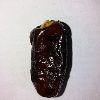

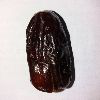

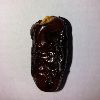

saudia


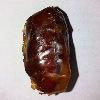

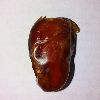

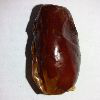

amirhajj


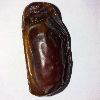

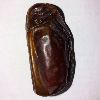

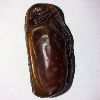

In [ ]:
from PIL import Image
import os
from IPython.display import display 
from imutils import paths

imgpths = paths.list_images('Dataset')
print('Dataset')
count=0
kelas_seb = None
for dirimg in imgpths:
  kelas = dirimg.split(os.path.sep) [1]
  if kelas_seb is None:
    print(kelas)
    kelas_seb = kelas
  if kelas_seb != kelas:
    print(kelas)
    count=0
    kelas_seb = kelas
  a = Image.open(dirimg)
 
  count=count+1
  if count <= 3:
    display(a)
  else:
    continue


Source code berikut berfungsi untuk mengambil nama folder yang ada pada folder Dataset dan mengambil setiap nama file gambar, kemudian untuk setiap folder atau kelas yang ada di Dataset akan ditampilkan gambar yang ada di subfolder berikut masing-masing 3 gambar.

In [ ]:
imgpths = paths.list_images('Dataset')
count=1
kelas_seb = None
for dirimg in imgpths:
  dir = dirimg.split(os.path.sep)[0]
  kelas = dirimg.split(os.path.sep)[1]
  nama = dirimg.split(os.path.sep)[2]
  if kelas_seb is None:
    kelas_seb = kelas
  if kelas_seb != kelas:
    count=1
    kelas_seb = kelas
  pat = os.path.join(dir,kelas,nama)
  nama_baru = kelas+str(count)+'.jpg'
  os.rename(pat,os.path.join(dir,kelas,nama_baru))
  count=count+1


Source code berikut berfungssi untuk mengubah nama file dari setiap gambar yang berada dalam folder kelas menjadi berformat "(nama kelas)1.jpg", "(nama kelas)2.jpg", dst.

In [ ]:
def unique(list1):
 
    unique_list = []
     
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

Sebuah function untuk mendapatkan nilai-nilai unik dari sebuah list, menjadi list baru yang berisi nilai-nilai yang tidak berulang.

In [ ]:
import numpy as np

kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224))) / 255.0
  kumpl_gmbr.append(gmbrz)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)
kelas_asli

['turkis', 'saudia', 'amirhajj']

Source code berikut berfungsi untuk mengumpulkan semua gambar dataset dalam satu variabel dan melakukan rescale serta normalisasi dengan membagi nilai warna dengan 255. Kemudian menyimpan label dari setiap gambar sesuai dengan posisi gambar berada di subfolder kelas mana. Lalu, mendapatkan nilai unique dari label ini sehingga dapat mengetahui ada berapa kelas dalam dataset tersebut.

In [ ]:
def image_to_feature_vector(image, size=(224, 224)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	# handle normalizing the histogram if we are using OpenCV 2.4.X
	if imutils.is_cv2():
		hist = cv2.normalize(hist)
	# otherwise, perform "in place" normalization in OpenCV 3 (I
	# personally hate the way this is done
	else:
		cv2.normalize(hist, hist)
	# return the flattened histogram as the feature vector
	return hist.flatten()

In [ ]:
import numpy as np
import cv2

kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224)))
  nil_pix = image_to_feature_vector(gmbrz)

  kumpl_gmbr.append(nil_pix)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)


In [ ]:
kumpl_lbl

array(['turkis', 'turkis', 'turkis', 'turkis', 'turkis', 'turkis',
       'turkis', 'turkis', 'turkis', 'turkis', 'turkis', 'turkis',
       'turkis', 'turkis', 'turkis', 'turkis', 'turkis', 'turkis',
       'turkis', 'turkis', 'turkis', 'turkis', 'turkis', 'turkis',
       'turkis', 'turkis', 'turkis', 'turkis', 'turkis', 'turkis',
       'turkis', 'turkis', 'turkis', 'turkis', 'turkis', 'turkis',
       'turkis', 'turkis', 'turkis', 'turkis', 'turkis', 'turkis',
       'turkis', 'turkis', 'turkis', 'turkis', 'turkis', 'turkis',
       'turkis', 'turkis', 'saudia', 'saudia', 'saudia', 'saudia',
       'saudia', 'saudia', 'saudia', 'saudia', 'saudia', 'saudia',
       'saudia', 'saudia', 'saudia', 'saudia', 'saudia', 'saudia',
       'saudia', 'saudia', 'saudia', 'saudia', 'saudia', 'saudia',
       'saudia', 'saudia', 'saudia', 'saudia', 'saudia', 'saudia',
       'saudia', 'saudia', 'saudia', 'saudia', 'saudia', 'saudia',
       'saudia', 'saudia', 'saudia', 'saudia', 'saudia', 'saud

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print("[INFO] Inisialisasi Model")
model = KNeighborsClassifier(n_neighbors=1)


[INFO] Inisialisasi Model


Pembentukkan model, sebelum ke source code penggunaan StratifiedKFold model perlu dibentuk terlebih dahulu.



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

from statistics import mean, stdev
import numpy as np

SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_acc_SF = []
kumpl_lbl = np.array(kumpl_lbl)
kumpl_gmbr = np.array(kumpl_gmbr)

for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl):
    model = KNeighborsClassifier(n_neighbors=1)
    xlatih_sf, xuji_sf = kumpl_gmbr[latih_idx], kumpl_gmbr[uji_idx]
    ylatih_sf, yuji_sf = kumpl_lbl[latih_idx], kumpl_lbl[uji_idx]
    model.fit(xlatih_sf, ylatih_sf)
    lst_acc_SF.append(model.score(xuji_sf, yuji_sf))
  
print('Daftar kemungkinan akurasi yang dapat dihasilkan:', lst_acc_SF)
print('\nMax Akurasi:',
      max(lst_acc_SF)*100, '%')
print('\nMin Akurasi:',
      min(lst_acc_SF)*100, '%')
print('\nAkurasi secara keseluruhan:',
      mean(lst_acc_SF)*100, '%')
print('\nStandard Deviation:', stdev(lst_acc_SF))

Daftar kemungkinan akurasi yang dapat dihasilkan: [0.8666666666666667, 0.9333333333333333, 0.8666666666666667, 0.9333333333333333, 1.0, 0.8, 0.9333333333333333, 0.8666666666666667, 1.0, 0.9333333333333333]

Max Akurasi: 100.0 %

Min Akurasi: 80.0 %

Akurasi secara keseluruhan: 91.33333333333333 %

Standard Deviation: 0.06324555320336757


Source code menggunakan fungsi StratifiedKFlod untuk melakukan berbagai macam sebaran data yang akan digunakan sebagai data latih dan data uji. Sebelum ke source code penggunaan StratifiedKFold model perlu dibentuk terlebih dahulu untuk setiap iterasinya . Setelah melakukan proses training dan validasi dari setiap penyebaran data uji dan data latih, nilai akurasi dari masing-masing nya akan disimpan. Source code berikut merupakan salah satu contoh penggunaan StratifiedKFold untuk Machine Learning dengan model KNN.

**SVM**

In [ ]:
import numpy as np
import cv2
from skimage.color import rgb2gray


kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224)))
  grey_image = rgb2gray(gmbrz)
  nil_pix = image_to_feature_vector(grey_image)

  kumpl_gmbr.append(nil_pix)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

svm = SVC(kernel='linear')


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.svm import SVC
from statistics import mean, stdev
import numpy as np

SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_acc_SF = []
kumpl_lbl = np.array(kumpl_lbl)
kumpl_gmbr = np.array(kumpl_gmbr)

for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl):
    svm = SVC(kernel='linear')
    xlatih_sf, xuji_sf = kumpl_gmbr[latih_idx], kumpl_gmbr[uji_idx]
    ylatih_sf, yuji_sf = kumpl_lbl[latih_idx], kumpl_lbl[uji_idx]
    svm.fit(xlatih_sf, ylatih_sf)
    lst_acc_SF.append(svm.score(xuji_sf, yuji_sf))
  
print('Daftar kemungkinan akurasi yang dapat dihasilkan:', lst_acc_SF)
print('\nMax Akurasi:',
      max(lst_acc_SF)*100, '%')
print('\nMin Akurasi:',
      min(lst_acc_SF)*100, '%')
print('\nAkurasi secara keseluruhan:',
      mean(lst_acc_SF)*100, '%')
print('\nStandard Deviation:', stdev(lst_acc_SF))

Daftar kemungkinan akurasi yang dapat dihasilkan: [0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 1.0, 1.0, 0.8666666666666667, 0.7333333333333333, 0.9333333333333333, 0.9333333333333333]

Max Akurasi: 100.0 %

Min Akurasi: 73.33333333333333 %

Akurasi secara keseluruhan: 90.0 %

Standard Deviation: 0.07856742013183862


In [ ]:
import pickle
pickle.dump(svm, open('model.pkl','wb'))


Source code berikut merupakan salah satu contoh penggunaan StratifiedKFold untuk Machine Learning dengan model SVM.

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier 

from statistics import mean, stdev
import numpy as np

SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_acc_SF = []
kumpl_lbl = np.array(kumpl_lbl)
kumpl_gmbr = np.array(kumpl_gmbr)

for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl):
    clf = DecisionTreeClassifier()

    xlatih_sf, xuji_sf = kumpl_gmbr[latih_idx], kumpl_gmbr[uji_idx]
    ylatih_sf, yuji_sf = kumpl_lbl[latih_idx], kumpl_lbl[uji_idx]
    clf.fit(xlatih_sf, ylatih_sf)
    lst_acc_SF.append(clf.score(xuji_sf, yuji_sf))
  
print('Daftar kemungkinan akurasi yang dapat dihasilkan:', lst_acc_SF)
print('\nMax Akurasi:',
      max(lst_acc_SF)*100, '%')
print('\nMin Akurasi:',
      min(lst_acc_SF)*100, '%')
print('\nAkurasi secara keseluruhan:',
      mean(lst_acc_SF)*100, '%')
print('\nStandard Deviation:', stdev(lst_acc_SF))

Daftar kemungkinan akurasi yang dapat dihasilkan: [0.9, 0.9, 0.8, 1.0, 0.9, 0.9, 1.0, 0.9, 1.0, 0.8]

Max Akurasi: 100.0 %

Min Akurasi: 80.0 %

Akurasi secara keseluruhan: 91.0 %

Standard Deviation: 0.07378647873726217


Source code berikut merupakan salah satu contoh penggunaan StratifiedKFold untuk Machine Learning dengan model Decision Tree.

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from statistics import mean, stdev
import numpy as np

SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_acc_SF = []
kumpl_lbl = np.array(kumpl_lbl)
kumpl_gmbr = np.array(kumpl_gmbr)

for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl):
    RF = RandomForestClassifier()

    xlatih_sf, xuji_sf = kumpl_gmbr[latih_idx], kumpl_gmbr[uji_idx]
    ylatih_sf, yuji_sf = kumpl_lbl[latih_idx], kumpl_lbl[uji_idx]
    RF.fit(xlatih_sf, ylatih_sf)
    lst_acc_SF.append(RF.score(xuji_sf, yuji_sf))
  
print('Daftar kemungkinan akurasi yang dapat dihasilkan:', lst_acc_SF)
print('\nMax Akurasi:',
      max(lst_acc_SF)*100, '%')
print('\nMin Akurasi:',
      min(lst_acc_SF)*100, '%')
print('\nAkurasi secara keseluruhan:',
      mean(lst_acc_SF)*100, '%')
print('\nStandard Deviation:', stdev(lst_acc_SF))

Daftar kemungkinan akurasi yang dapat dihasilkan: [1.0, 0.9, 1.0, 1.0, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0]

Max Akurasi: 100.0 %

Min Akurasi: 90.0 %

Akurasi secara keseluruhan: 97.0 %

Standard Deviation: 0.04830458915396478


Source code berikut merupakan salah satu contoh penggunaan StratifiedKFold untuk Machine Learning dengan model Random Forest.

VGG 16

In [ ]:
import numpy as np
from PIL import Image


kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224))) / 255.0
  kumpl_gmbr.append(gmbrz)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)
kelas_asli

['turkis', 'saudia']

Karena untuk Machine Learning dan Deep Learning menggunakan bentuk data yang berbeda maka kita perlu menjalankan code untuk melakukan preprocessng terhadap dataset kembali.

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
kumpl_lbl = lb.fit_transform(kumpl_lbl)
if len(kelas_asli)==2:
  kumpl_lbl = np.hstack((kumpl_lbl, 1 - kumpl_lbl))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
import numpy as np

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models

SF = StratifiedKFold(n_splits=10, shuffle=True)
acc_per_fold = []
loss_per_fold = []
kumpl_lbl = np.array(kumpl_lbl)
# kumpl_lbl = kumpl_lbl.reshape(kumpl_lbl.shape[0], 1)
kumpl_gmbr = np.array(kumpl_gmbr)
fold_no = 1

for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl.argmax(1)):
    vgg = VGG16(input_shape=[224,224] + [3], weights='imagenet', include_top=False)
    vgg.trainable = False 
    flatten_layer = layers.Flatten()
    dense_layer_1 = layers.Dense(50, activation='relu')
    dense_layer_2 = layers.Dense(20, activation='relu')
    prediction_layer = layers.Dense(len(kelas_asli), activation='softmax')

    vgg_new = models.Sequential([
        vgg,
        flatten_layer,
        dense_layer_1,
        dense_layer_2,
        prediction_layer
    ])

    vgg_new.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    h = vgg_new.fit(kumpl_gmbr[latih_idx], kumpl_lbl[latih_idx,:], epochs = 10, batch_size = 25)
    scores = vgg_new.evaluate(kumpl_gmbr[uji_idx], kumpl_lbl[uji_idx], verbose=0)
    print(f'Score for fold {fold_no}: {vgg_new.metrics_names[0]} of {scores[0]}; {vgg_new.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no = fold_no + 1

print('------------------------------------------------------------------------')
print('VGG16')

print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Rata-rata nilai untuk setiap Fold:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/10
4/4 [==============================] - 29s 3s/step - loss: 0.7353 - accuracy: 0.5889
Epoch 2/10
4/4 [==============================] - 1s 249ms/step - loss: 0.3475 - accuracy: 0.8222
Epoch 3/10
4/4 [==============================] - 1s 247ms/step - loss: 0.1539 - accuracy: 0.9778
Epoch 4/10
4/4 [==============================] - 1s 247ms/step - loss: 0.0699 - accuracy: 0.9889
Epoch 5/10
4/4 [==============================] - 1s 248ms/step - loss: 0.0489 - accuracy: 0.9889
Epoch 6/10
4/4 [==============================] - 1s 248ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 1s 247ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 1s 247ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 1s 246ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 1s 2

Source code berikut merupakan contoh penggunaan fungsi StratifiedKFold pada Deep Learning, akuisisi pre-trained model VGG-16 dan pembentukkan model VGG16 di dalam proses iterasi. Kemudian sama seperti pada ML, masing-masing nilai akurasi disimpan dan untuk DL ditambahkan adanya nilai loss. Iterasi StratifiedKFold mengikuti banyaknya n_folds yang telah di-state saat deklarasi fungsi KStratifiedKFold. 

VGG19

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
import numpy as np

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import layers, models
from tensorflow.keras.losses import sparse_categorical_crossentropy

SF = StratifiedKFold(n_splits=10, shuffle=True)

acc_per_fold = []
loss_per_fold = []
kumpl_lbl = np.array(kumpl_lbl)
# kumpl_lbl = kumpl_lbl.reshape(kumpl_lbl.shape[0], 1)
kumpl_gmbr = np.array(kumpl_gmbr)
fold_no = 1

for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl.argmax(1)):
    vgg = VGG19(input_shape=[224,224] + [3], weights='imagenet', include_top=False)
    vgg.trainable = False 
    flatten_layer = layers.Flatten()
    dense_layer_1 = layers.Dense(50, activation='relu')
    dense_layer_2 = layers.Dense(20, activation='relu')
    prediction_layer = layers.Dense(len(kelas_asli), activation='softmax')

    vgg_new = models.Sequential([
        vgg,
        flatten_layer,
        dense_layer_1,
        dense_layer_2,
        prediction_layer
    ])

    vgg_new.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    h = vgg_new.fit(kumpl_gmbr[latih_idx], kumpl_lbl[latih_idx,:], epochs = 10, batch_size = 25)
    scores = vgg_new.evaluate(kumpl_gmbr[uji_idx], kumpl_lbl[uji_idx], verbose=0)
    print(f'Score for fold {fold_no}: {vgg_new.metrics_names[0]} of {scores[0]}; {vgg_new.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no = fold_no + 1

print('------------------------------------------------------------------------')
print('VGG19')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Rata-rata nilai untuk setiap Fold:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

80150528/80134624 [==============================] - 1s 0us/step
Epoch 1/10
4/4 [==============================] - 2s 292ms/step - loss: 1.4935 - accuracy: 0.5444
Epoch 2/10
4/4 [==============================] - 1s 292ms/step - loss: 0.5022 - accuracy: 0.7444
Epoch 3/10
4/4 [==============================] - 1s 293ms/step - loss: 0.1597 - accuracy: 0.9667
Epoch 4/10
4/4 [==============================] - 1s 292ms/step - loss: 0.0365 - accuracy: 0.9778
Epoch 5/10
4/4 [==============================] - 1s 291ms/step - loss: 0.0605 - accuracy: 0.9889
Epoch 6/10
4/4 [==============================] - 1s 294ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 1s 291ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 1s 292ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 1s 291ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 1s

Source code berikut merupakan contoh penggunaan fungsi StratifiedKFold pada Deep Learning dengan model VGG19

ResNet

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
import numpy as np

import tensorflow.keras 


from tensorflow.keras.losses import sparse_categorical_crossentropy

SF = StratifiedKFold(n_splits=10, shuffle=True)
acc_per_fold = []
loss_per_fold = []
kumpl_lbl = np.array(kumpl_lbl)
kumpl_gmbr = np.array(kumpl_gmbr)
fold_no = 1

for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl.argmax(1)):
    input_img = tensorflow.keras.Input(shape=(224,224,3))
    Res_mod = tensorflow.keras.applications.ResNet50(include_top = False, weights = "imagenet", input_tensor=input_img)
    for layer in Res_mod.layers[:143]:
      layer.trainable = False
    to_res = (224,224)

    lambda_layer = layers.Lambda(lambda image: tensorflow.image.resize(image,to_res))
    flatten_layer = layers.Flatten()
    batch_layer = layers.BatchNormalization()
    dropout_layer = layers.Dropout(0.5)
    dense_layer_1 = layers.Dense(256, activation='relu')
    dense_layer_2 = layers.Dense(128, activation='relu')
    dense_layer_3 = layers.Dense(64, activation='relu')
    prediction_layer = layers.Dense(len(kelas_asli), activation='softmax')

    Resnew = models.Sequential([
        lambda_layer,
        Res_mod,
        flatten_layer,
        batch_layer,
        dense_layer_1,
        dropout_layer,
        batch_layer,
        dense_layer_2,
        dropout_layer,
        batch_layer,
        dense_layer_3,
        dropout_layer,
        batch_layer,
        prediction_layer
    ])

    Resnew.compile(
        optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=2e-5),
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    h = Resnew.fit(kumpl_gmbr[latih_idx], kumpl_lbl[latih_idx,:], epochs = 10, batch_size = 25)
    scores = Resnew.evaluate(kumpl_gmbr[uji_idx], kumpl_lbl[uji_idx], verbose=0)
    print(f'Score for fold {fold_no}: {Resnew.metrics_names[0]} of {scores[0]}; {Resnew.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no = fold_no + 1

print('------------------------------------------------------------------------')
print('ResNet')

print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Rata-rata nilai untuk setiap Fold:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/10
4/4 [==============================] - 12s 789ms/step - loss: 0.6743 - accuracy: 0.6111
Epoch 2/10
4/4 [==============================] - 1s 316ms/step - loss: 0.3376 - accuracy: 0.8222
Epoch 3/10
4/4 [==============================] - 1s 315ms/step - loss: 0.1573 - accuracy: 0.9667
Epoch 4/10
4/4 [==============================] - 1s 315ms/step - loss: 0.0990 - accuracy: 0.9889
Epoch 5/10
4/4 [==============================] - 1s 315ms/step - loss: 0.0634 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 1s 317ms/step - loss: 0.0342 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 1s 317ms/step - loss: 0.0393 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 1s 317ms/step - loss: 0.0273 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 1s 316ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 1

Source code berikut merupakan contoh penggunaan fungsi StratifiedKFold pada Deep Learning dengan model ResNet

Inception V3

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
import numpy as np

from keras.applications.inception_v3 import InceptionV3



from tensorflow.keras.losses import sparse_categorical_crossentropy

SF = StratifiedKFold(n_splits=10, shuffle=True)
acc_per_fold = []
loss_per_fold = []
kumpl_lbl = np.array(kumpl_lbl)
kumpl_gmbr = np.array(kumpl_gmbr)
fold_no = 1

for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl.argmax(1)):
    incv3 = InceptionV3(input_shape=[224,224] + [3], weights='imagenet', include_top=False)
    incv3.trainable = False 
    flatten_layer = layers.Flatten()
    dense_layer_1 = layers.Dense(50, activation='relu')
    dense_layer_2 = layers.Dense(20, activation='relu')
    prediction_layer = layers.Dense(len(kelas_asli), activation='softmax')

    incv3_new = models.Sequential([
        incv3,
        flatten_layer,
        dense_layer_1,
        dense_layer_2,
        prediction_layer
    ])

    incv3_new.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )

    h = incv3_new.fit(kumpl_gmbr[latih_idx], kumpl_lbl[latih_idx,:], epochs = 10, batch_size = 25)
    scores = incv3_new.evaluate(kumpl_gmbr[uji_idx], kumpl_lbl[uji_idx], verbose=0)
    print(f'Score for fold {fold_no}: {incv3_new.metrics_names[0]} of {scores[0]}; {incv3_new.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no = fold_no + 1

print('------------------------------------------------------------------------')
print('InceptionV3')

print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Rata-rata nilai untuk setiap Fold:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

87924736/87910968 [==============================] - 1s 0us/step
Epoch 1/10
4/4 [==============================] - 10s 763ms/step - loss: 4.2004 - accuracy: 0.4778
Epoch 2/10
4/4 [==============================] - 1s 173ms/step - loss: 1.3979 - accuracy: 0.6556
Epoch 3/10
4/4 [==============================] - 1s 174ms/step - loss: 0.0826 - accuracy: 0.9778
Epoch 4/10
4/4 [==============================] - 1s 174ms/step - loss: 0.0379 - accuracy: 0.9778
Epoch 5/10
4/4 [==============================] - 1s 175ms/step - loss: 0.1074 - accuracy: 0.9556
Epoch 6/10
4/4 [==============================] - 1s 175ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 1s 174ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 1s 175ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 1s 174ms/step - loss: 9.0035e-04 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================]

Source code berikut merupakan contoh penggunaan fungsi StratifiedKFold pada Deep Learning dengan model InceptionV3

EfficientB0

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
import numpy as np

from keras.applications.inception_v3 import InceptionV3



from tensorflow.keras.losses import sparse_categorical_crossentropy

SF = StratifiedKFold(n_splits=10, shuffle=True)
acc_per_fold = []
loss_per_fold = []
kumpl_lbl = np.array(kumpl_lbl)
kumpl_gmbr = np.array(kumpl_gmbr)
fold_no = 1

for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl.argmax(1)):
    effB0 = tensorflow.keras.applications.efficientnet.EfficientNetB0(weights="imagenet", include_top=False, input_shape=((224,224,3)))
    effB0.trainable = False
    dropout_rate = 0.2
    effB0_new = models.Sequential()
    effB0_new.add(effB0)
    effB0_new.add(layers.GlobalMaxPooling2D(name="gap"))
    # model.add(layers.Flatten(name="flatten"))
    if dropout_rate > 0:
        effB0_new.add(layers.Dropout(dropout_rate, name="dropout_out"))
    effB0_new.add(layers.Dense(len(kelas_asli), activation="softmax", name="fc_out"))

    effB0_new.compile(
        loss="categorical_crossentropy",
        optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=2e-5),
        metrics=["acc"],
    )

    h = effB0_new.fit(kumpl_gmbr[latih_idx], kumpl_lbl[latih_idx,:], epochs = 10, batch_size = 25)
    scores = effB0_new.evaluate(kumpl_gmbr[uji_idx], kumpl_lbl[uji_idx], verbose=0)
    print(f'Score for fold {fold_no}: {effB0_new.metrics_names[0]} of {scores[0]}; {effB0_new.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no = fold_no + 1

print('------------------------------------------------------------------------')
print('EfficientB0')

print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Rata-rata nilai untuk setiap Fold:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

16719872/16705208 [==============================] - 0s 0us/step
Epoch 1/10
4/4 [==============================] - 9s 340ms/step - loss: 7.0492 - acc: 0.5000
Epoch 2/10
4/4 [==============================] - 0s 115ms/step - loss: 5.3024 - acc: 0.5000
Epoch 3/10
4/4 [==============================] - 0s 119ms/step - loss: 4.9429 - acc: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 117ms/step - loss: 4.3122 - acc: 0.4778
Epoch 5/10
4/4 [==============================] - 0s 117ms/step - loss: 4.0841 - acc: 0.5111
Epoch 6/10
4/4 [==============================] - 0s 118ms/step - loss: 4.3658 - acc: 0.5000
Epoch 7/10
4/4 [==============================] - 0s 119ms/step - loss: 3.7820 - acc: 0.4556
Epoch 8/10
4/4 [==============================] - 0s 120ms/step - loss: 3.5696 - acc: 0.5000
Epoch 9/10
4/4 [==============================] - 0s 119ms/step - loss: 2.8717 - acc: 0.4222
Epoch 10/10
4/4 [==============================] - 0s 117ms/step - loss: 2.7192 - acc: 0.5111
Scor

Source code berikut merupakan contoh penggunaan fungsi StratifiedKFold pada Deep Learning dengan model EfficientB0

EfficientB7

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
import numpy as np

from keras.applications.inception_v3 import InceptionV3



from tensorflow.keras.losses import sparse_categorical_crossentropy

SF = StratifiedKFold(n_splits=10, shuffle=True)
acc_per_fold = []
loss_per_fold = []
kumpl_lbl = np.array(kumpl_lbl)
kumpl_gmbr = np.array(kumpl_gmbr)
fold_no = 1

for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl.argmax(1)):
    effB7 = tensorflow.keras.applications.efficientnet.EfficientNetB7(weights="imagenet", include_top=False, input_shape=((224,224,3)))
    effB7.trainable = False
    dropout_rate = 0.2
    effB7_new = models.Sequential()
    effB7_new.add(effB7)
    effB7_new.add(layers.GlobalMaxPooling2D(name="gap"))
    if dropout_rate > 0:
        effB7_new.add(layers.Dropout(dropout_rate, name="dropout_out"))
    effB7_new.add(layers.Dense(len(kelas_asli), activation="softmax", name="fc_out"))

    effB7_new.compile(
        loss="categorical_crossentropy",
        optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=2e-5),
        metrics=["acc"],
    )

    h = effB7_new.fit(kumpl_gmbr[latih_idx], kumpl_lbl[latih_idx,:], epochs = 10, batch_size = 25)
    scores = effB7_new.evaluate(kumpl_gmbr[uji_idx], kumpl_lbl[uji_idx], verbose=0)
    print(f'Score for fold {fold_no}: {effB7_new.metrics_names[0]} of {scores[0]}; {effB7_new.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no = fold_no + 1

print('------------------------------------------------------------------------')
print('EfficientB7')

print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Rata-rata nilai untuk setiap Fold:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

258088960/258076736 [==============================] - 2s 0us/step
Epoch 1/10
4/4 [==============================] - 32s 1s/step - loss: 2.3308 - acc: 0.4778
Epoch 2/10
4/4 [==============================] - 3s 735ms/step - loss: 2.4806 - acc: 0.5000
Epoch 3/10
4/4 [==============================] - 3s 734ms/step - loss: 2.5535 - acc: 0.4778
Epoch 4/10
4/4 [==============================] - 3s 734ms/step - loss: 2.1599 - acc: 0.4889
Epoch 5/10
4/4 [==============================] - 3s 735ms/step - loss: 2.0691 - acc: 0.5333
Epoch 6/10
4/4 [==============================] - 3s 731ms/step - loss: 2.2291 - acc: 0.4556
Epoch 7/10
4/4 [==============================] - 3s 727ms/step - loss: 2.2358 - acc: 0.5000
Epoch 8/10
4/4 [==============================] - 3s 731ms/step - loss: 2.1603 - acc: 0.4000
Epoch 9/10
4/4 [==============================] - 3s 730ms/step - loss: 2.1074 - acc: 0.5667
Epoch 10/10
4/4 [==============================] - 3s 727ms/step - loss: 2.2102 - acc: 0.4889
Scor

Source code berikut merupakan contoh penggunaan fungsi StratifiedKFold pada Deep Learning dengan model EfficientB7